# Plotting data from videos
Leanne Friedrich 5/22/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import pandas as pd
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)
IMFOLDER = os.path.join(cfg.path.fig, 'images')

In [4]:
horizCloseCropDefault = {'x0':400, 'xf':600, 'y0':400, 'yf':600}
vertCloseCropDefault = {'x0':60, 'xf':210, 'y0':350, 'yf':500}
xsFigDefault = 'xs2_raw_0'
xsVidCropDefault = {'x0':160, 'y0':240, 'w':300}
dates = pd.DataFrame([{'folder':r'vels LapRD LapRD 1day\I_2.75_S_2.75', 'dates':['210824', '210921']
              , 'horizCloseCrop':{'x0':600, 'xf':800, 'y0':300, 'yf':500}
              , 'horizCrop':{'x0':50, 'xf':1050, 'y0':50, 'yf':820}
             , 'xsCrop': {'x0':400, 'y0':300, 'w':450}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
                      },
         {'folder':r'vels LapRD LapRD 1day\I_3.50_S_2.50', 'dates':['210929']
              , 'horizCloseCrop':{'x0':600, 'xf':800, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':50, 'yf':820}
             , 'xsCrop':  {'x0':400, 'y0':300, 'w':400}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         }, 
        {'folder':r'vels LapRD LapRD 1day\I_3.00_S_3.00', 'dates':['211109']
              , 'horizCloseCrop':{'x0':520, 'xf':790, 'y0':320, 'yf':590}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':50, 'yf':820}
             , 'xsCrop':  {'x0':400, 'y0':420, 'w':770}, 'xsFig': 'xs2'
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         }, 
         {'folder':'LapRD LapRD 1day', 'dates':['210728','210727']
              , 'horizCloseCrop':{'x0':600, 'xf':800, 'y0':330, 'yf':530}
             , 'horizCrop':{'x0':100, 'xf':1050, 'y0':80, 'yf':850}
             , 'xsCrop':  {'x0':350, 'y0':400, 'w':450}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'PEGDA LapRD', 'dates':['210630']
              , 'horizCloseCrop':{'x0':300, 'xf':500, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':950, 'y0':80, 'yf':790}
             , 'xsCrop':  {'x0':400, 'y0':420, 'w':770}, 'xsFig': 'xs2'
             , 'xsVidCrop': {'x0':150, 'y0':240, 'w':300}
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'PEGDA LapRD', 'dates':['211006']
              , 'horizCloseCrop':{'x0':300, 'xf':500, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':950, 'y0':80, 'yf':790}
             , 'xsCrop':  {'x0':400, 'y0':420, 'w':770}, 'xsFig': 'xs2'
             , 'xsVidCrop':{'x0':150, 'y0':240, 'w':300}
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':r'vels mineral LapRD\I_M6_S_3.00', 'dates':['210824']
              , 'horizCloseCrop':{'x0':400, 'xf':600, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':80, 'yf':790}
             , 'xsCrop':  {'x0':350, 'y0':320, 'w':400}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':r'vels mineral LapRD\I_M5_S_3.00', 'dates':['211005']
              , 'horizCloseCrop':{'x0':400, 'xf':600, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':80, 'yf':790}
             , 'xsCrop':  {'x0':350, 'y0':320, 'w':400}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'mineral812 LapRD', 'dates':['210921']
#             {'folder':'mineral812 LapRD', 'dates':['210519']
              , 'horizCloseCrop':{'x0':500, 'xf':700, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':50, 'yf':840}
             , 'xsCrop':  {'x0':400, 'y0':320, 'w':600}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'mineral812S LapRDT', 'dates':['211005']
#         {'folder':'mineral812S LapRDT', 'dates':['210922']
              , 'horizCloseCrop':{'x0':400, 'xf':600, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':1050, 'y0':50, 'yf':820}
             , 'xsCrop':  {'x0':350, 'y0':320, 'w':450}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'PDMSM LapRD', 'dates':['210630']
              , 'horizCloseCrop':{'x0':400, 'xf':600, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':50, 'xf':950, 'y0':80, 'yf':790}
             , 'xsCrop': {'x0':400, 'y0':500, 'w':600}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         },
         {'folder':'PDMSS LapRD', 'dates':['210713']
              , 'horizCloseCrop':{'x0':400, 'xf':600, 'y0':300, 'yf':500}
             , 'horizCrop':{'x0':100, 'xf':950, 'y0':80, 'yf':770}
             , 'xsCrop':   {'x0':400, 'y0':400, 'w':500}, 'xsFig': xsFigDefault
             , 'xsVidCrop': xsVidCropDefault
            , 'vertCloseCrop':vertCloseCropDefault
         }
        ])

In [5]:
def horizCloseUp(d:pd.Series, showFig:bool=False, export:bool=True, overlay:dict={'shape':'circle', 'dx':0.4, 'dy':-0.4}):
    tag = 'horizfull'
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export, 'overlay':overlay}
    kwargs['crops'] = d['horizCloseCrop']
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag, overwrite=True, zoom='close', **kwargs)

In [6]:
def vertCloseUp(d:pd.Series, showFig:bool=False, export:bool=True, overlay:dict={'shape':'circle', 'dx':0.4, 'dy':-0.4}):
    tag = 'vert2'
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export, 'overlay':overlay}
    kwargs['crops'] = d['vertCloseCrop']
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag, overwrite=True, zoom='close', **kwargs)

In [22]:
def horiz(d:pd.Series, showFig:bool=False, export:bool=True, dy:float=0.65):
    tag = 'horizfull'
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    kwargs['crops'] = d['horizCrop']
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    if float(d['dates'][0][:6])>=210929:
        w = 21
    else:
        w = 17
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag,overwrite=True, overlay={'shape':'rectangle', 'dy':dy, 'w':w}, **kwargs)

In [8]:
def horizVid(d:pd.Series, showFig:bool=False, export:bool=True
             , crops:dict={'x0':200, 'xf':800, 'y0':0, 'yf':600}
             , overlay:dict={'shape':'rectangle', 'dx':0.4, 'dy':-0.4, 'w':0.15}):
    tag = 'vid_horiz1'
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    kwargs['crops'] = crops
    kwargs['overlay'] = overlay
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag,overwrite=True, **kwargs)

In [9]:
def xs(d:pd.Series, showFig:bool=False, export:bool=True):
    tag = d['xsFig']
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    x0 = d['xsCrop']['x0']
    w = d['xsCrop']['w']
    y0 = d['xsCrop']['y0']
    kwargs['crops'] = {'x0':x0-w/2, 'xf':x0+w/2, 'y0':y0-w/2, 'yf':y0+w/2}
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag,overwrite=True, overlay={'shape':'circle', 'dx':0.4, 'dy':-0.4},  **kwargs)

In [10]:
def xsVid(d:pd.Series, showFig:bool=False, export:bool=True):
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    kwargs['crops'] = [{},{}]
    x0 = d['xsVidCrop']['x0']
    w = d['xsVidCrop']['w']
    h = d['xsCrop']['w']
    y0 = d['xsVidCrop']['y0']
    kwargs['crops'][0] = {'x0':-330, 'xf':-70, 'y0':max(0,y0-h/2), 'yf':y0+h/2}
    x0 = d['xsCrop']['x0']
    w = d['xsCrop']['w']*0.6
    h = d['xsCrop']['w']
    y0 = d['xsCrop']['y0']
    kwargs['crops'][1] = {'x0':max(0,x0-w/2), 'xf':x0+w/2, 'y0':max(0,y0-h/2), 'yf':y0+h/2}
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    return vp.picPlots0(f, IMFOLDER, d['dates'], ['vid_xs2', 'xs2'],overwrite=True, overlay={'shape':'circle', 'dx':0.4, 'dy':0.4}, **kwargs)

In [11]:
def vert(d:pd.Series, showFig:bool=False, export:bool=True):
    tag = ['vert4','vert3','vert2', 'vert1']
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    kwargs['crops'] = {'x0':50, 'xf':260, 'y0':50, 'yf':1100}
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    if float(d['dates'][0][:6])>=210929:
        h = 14
    else:
        h = 10
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag, overwrite=True, overlay={'shape':'rectangle', 'dx':0.6, 'h':h}, **kwargs)

In [12]:
def vertVid(d:pd.Series, showFig:bool=False, export:bool=True):
    tag = ['vid_vert2_40','vert2_raw_3']
    f = os.path.join(cfg.path.server, 'singleLines', d['folder'])
    kwargs = {'showFig':showFig, 'export':export}
    if 'vels' in d['folder']:
        kwargs['vname'] = 'v'
    w = 330
    kwargs['crops'] = [{'x0':0, 'xf':w, 'y0':0, 'yf':590}, {'x0':400-w/2, 'xf':400+w/2, 'y0':5, 'yf':595}]
    return vp.picPlots0(f, IMFOLDER, d['dates'], tag, overwrite=True, overlay={'shape':'rectangle', 'dy':-0.5, 'dx':0.4, 'h':0.2, 'color':'white'}, **kwargs)

In [23]:
def allGrids(d):
    horizCloseUp(d)
    horiz(d)
    horizVid(d)
    xs(d)
    xsVid(d)
    vert(d)
    vertVid(d)

In [24]:
dates.folder

0     vels LapRD LapRD 1day\I_2.75_S_2.75
1     vels LapRD LapRD 1day\I_3.50_S_2.50
2     vels LapRD LapRD 1day\I_3.00_S_3.00
3                        LapRD LapRD 1day
4                             PEGDA LapRD
5                             PEGDA LapRD
6          vels mineral LapRD\I_M6_S_3.00
7          vels mineral LapRD\I_M5_S_3.00
8                        mineral812 LapRD
9                      mineral812S LapRDT
10                            PDMSM LapRD
11                            PDMSS LapRD
Name: folder, dtype: object

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.00_S_3.00\horizfull_I_3.00_S_3.00_dates_211109_zoom_close_vname_v


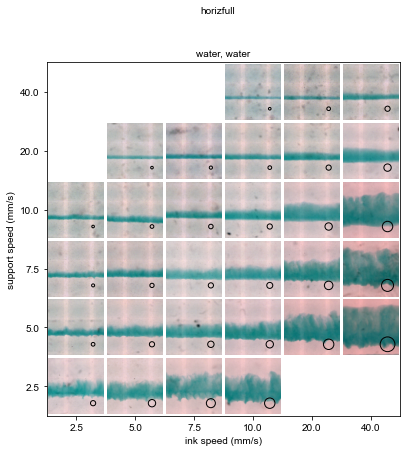

In [41]:
horizCloseUp(dates.loc[2])

In [26]:
for i,d in dates.iterrows():
    horizCloseUp(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\horizfull_I_2.75_S_2.75_dates_210824_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\horizfull_I_3.50_S_2.50_dates_210929_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.00_S_3.00\horizfull_I_3.00_S_3.00_dates_211109_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\horizfull_LapRD LapRD 1day_dates_210728_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\horizfull_PEGDA LapRD_dates_210630_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\horizfull_PEGDA LapRD_dates_211006_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\horizfull_I_M6_S_3.00_dates_210824_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/sho

In [23]:
for i,d in dates.iterrows():
    horiz(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\horizfull_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\horizfull_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\horizfull_LapRD LapRD 1day_dates_210728v1
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\horizfull_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\horizfull_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\horizfull_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3.00\horizfull_I_M5_S_3.00_dates_211005_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\mineral812 LapRD\horizfull_mineral812 LapRD_dates_210921
Ex

In [24]:
for i,d in dates.iterrows():
    horizVid(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\vid_horiz1_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\vid_horiz1_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\vid_horiz1_LapRD LapRD 1day_dates_210728v1
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_horiz1_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_horiz1_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\vid_horiz1_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3.00\vid_horiz1_I_M5_S_3.00_dates_211005_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\mineral812 LapRD\vid_horiz1_mineral812 LapRD_dates_2

In [25]:
for i,d in dates.iterrows():
    xs(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\xs2_raw_0_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\xs2_raw_0_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\xs2_raw_0_LapRD LapRD 1day_dates_210728v1
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\xs2_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\xs2_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\xs2_raw_0_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3.00\xs2_raw_0_I_M5_S_3.00_dates_211005_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\mineral812 LapRD\xs2_raw_0_mineral812 LapRD_dates_210921
Exported  C:/U

In [31]:
for i,d in dates.iterrows():
    xsVid(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\vid_xs2xs2_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\vid_xs2xs2_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\vid_xs2xs2_LapRD LapRD 1day_dates_210728v1
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_xs2xs2_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_xs2xs2_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\vid_xs2xs2_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3.00\vid_xs2xs2_I_M5_S_3.00_dates_211005_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\mineral812 LapRD\vid_xs2xs2_mineral812 LapRD_dates_2

In [15]:
for i,d in dates.iterrows():
    vert(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\vert4vert3vert2vert1_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\vert4vert3vert2vert1_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.00_S_3.00\vert4vert3vert2vert1_I_3.00_S_3.00_dates_211109_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\vert4vert3vert2vert1_LapRD LapRD 1day_dates_210728
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vert4vert3vert2vert1_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vert4vert3vert2vert1_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\vert4vert3vert2vert1_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/sho

In [12]:
for i,d in dates.iterrows():
    vertCloseUp(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\vert2_I_2.75_S_2.75_dates_210824_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\vert2_I_3.50_S_2.50_dates_210929_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.00_S_3.00\vert2_I_3.00_S_3.00_dates_211109_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\vert2_LapRD LapRD 1day_dates_210728_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vert2_PEGDA LapRD_dates_210630_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vert2_PEGDA LapRD_dates_211006_zoom_close
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\vert2_I_M6_S_3.00_dates_210824_zoom_close_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3

In [43]:
for i,d in dates.iterrows():
    vertVid(d)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_2.75_S_2.75\vid_vert2_40vert2_raw_3_I_2.75_S_2.75_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_3.50_S_2.50\vid_vert2_40vert2_raw_3_I_3.50_S_2.50_dates_210929_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\LapRD LapRD 1day\vid_vert2_40vert2_raw_3_LapRD LapRD 1day_dates_210728v1
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_vert2_40vert2_raw_3_PEGDA LapRD_dates_210630
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vid_vert2_40vert2_raw_3_PEGDA LapRD_dates_211006
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M6_S_3.00\vid_vert2_40vert2_raw_3_I_M6_S_3.00_dates_210824_vname_v
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\I_M5_S_3.00\vid_vert2_40vert2_raw_3_I_M5_S_3.00_dates_211005_vname_v
Exported  C:/Users/lmf1/OneDriv

In [34]:
vert(dates.loc[3])

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\images\PEGDA LapRD\vert1vert2vert3vert4_PEGDA LapRD_dates_210630


In [39]:
vp.picFileFromFolder(os.path.join(cfg.path.server, r'singleLines\PEGDA LapRD\I_PEG7.5_S_2.25\I_PEG7.5_S_2.25_210630'), 'vert1')

'//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\\PEGDA LapRD\\I_PEG7.5_S_2.25\\I_PEG7.5_S_2.25_210630\\I_PEG7.5_S_2.25_210630_vert1_0.429_00.png'

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_PEG10_S_2.25_210630_horizvid
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_PEG5_S_3.00_210630_horizvid


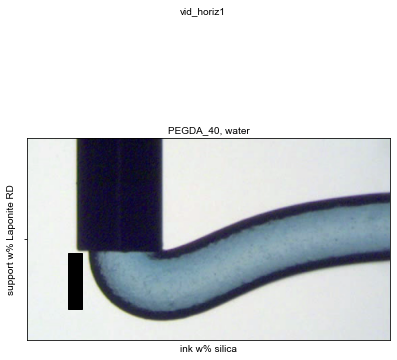

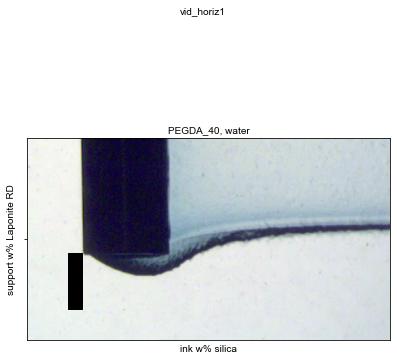

In [58]:
fig = horizVid({'folder':r'PEGDA LapRD\I_PEG10_S_2.25\I_PEG10_S_2.25_210630', 'dates':['210630']
         }, export=False, crops={'x0':250, 'xf':800, 'y0':100, 'yf':400}, overlay={'shape':'rectangle', 'dx':-0.48, 'dy':-0.15, 'w':0.15}, showFig=True)
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_PEG10_S_2.25_210630_horizvid' ), fig)
fig = horizVid({'folder':r'PEGDA LapRD\I_PEG5_S_3.00\I_PEG5_S_3.00_210630', 'dates':['210630']
         }, export=False, crops={'x0':250, 'xf':800, 'y0':100, 'yf':400}, overlay={'shape':'rectangle', 'dx':-0.48, 'dy':-0.15, 'w':0.15}, showFig=True)
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_PEG5_S_3.00_210630_horizvid' ), fig)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_2.75_S_3.50_horizclose
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_3.50_S_2.25_horizclose
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_M5_S_4.00_horizclose
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\figures\I_M9_S_2.75_horizclose


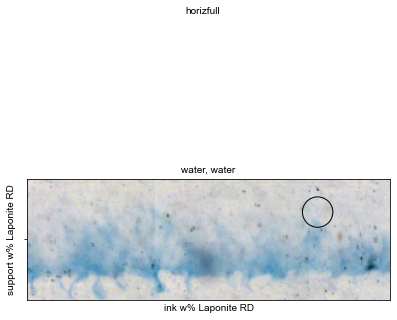

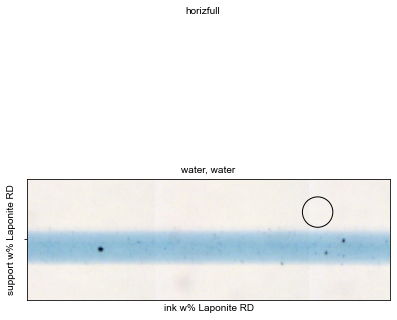

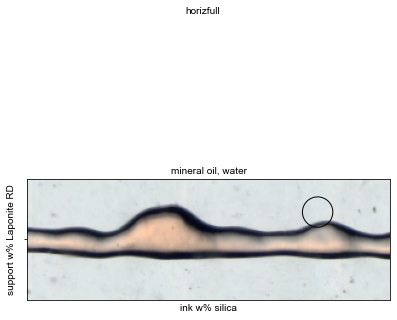

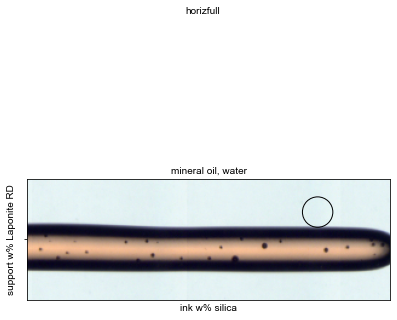

In [57]:
fig = horizCloseUp({'folder':r'LapRD LapRD 1day\I_2.75_S_3.50', 'dates':['210727'], 'horizCloseCrop':{'x0':500, 'xf':800, 'y0':400, 'yf':500}
         }, export=False, showFig=True, overlay={'shape':'circle', 'dx':0.4, 'dy':0.1})
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_2.75_S_3.50_horizclose' ), fig)
fig = horizCloseUp({'folder':r'LapRD LapRD 1day\I_3.50_S_2.25', 'dates':['210727'], 'horizCloseCrop':{'x0':500, 'xf':800, 'y0':370, 'yf':470}
         }, export=False, showFig=True, overlay={'shape':'circle', 'dx':0.4, 'dy':0.1})
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_3.50_S_2.25_horizclose' ), fig)
fig = horizCloseUp({'folder':r'mineral812 LapRD\I_M5_S_4.00', 'dates':['210921'], 'horizCloseCrop':{'x0':500, 'xf':800, 'y0':370, 'yf':470}
         }, export=False, showFig=True, overlay={'shape':'circle', 'dx':0.4, 'dy':0.1})
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_M5_S_4.00_horizclose' ), fig)
fig = horizCloseUp({'folder':r'mineral812 LapRD\I_M9_S_2.75', 'dates':['210921'], 'horizCloseCrop':{'x0':500, 'xf':800, 'y0':370, 'yf':470}
         }, export=False, showFig=True, overlay={'shape':'circle', 'dx':0.4, 'dy':0.1})
vp.exportIm(os.path.join(cfg.path.fig, 'figures','I_M9_S_2.75_horizclose' ), fig)

Exported  //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M5_S_3.00\I_M5_S_3.00_VI_2.5_VS_5_211005\line2


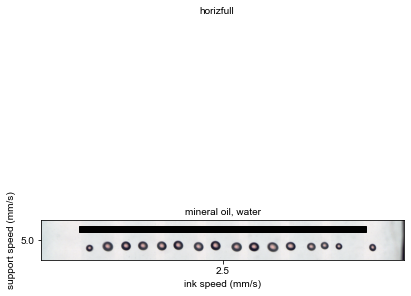

In [32]:
d = {'folder':r'vels mineral LapRD\I_M5_S_3.00\I_M5_S_3.00_VI_2.5_VS_5_211005'
    , 'dates':['211005']
     , 'horizCrop':{'x0':0, 'xf':-1, 'y0':380, 'yf':500}
         }
fig = horiz(d, export=False, showFig=True, dy=0.04)
vp.exportIm(os.path.join(cfg.path.server, 'singleLines', d['folder'],'line2'), fig)

Exported  //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_5_210824\line2


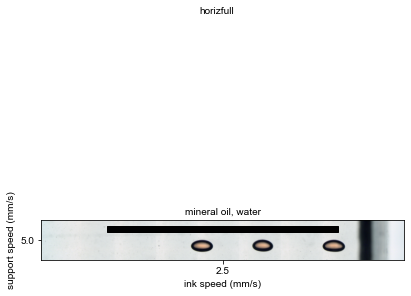

In [31]:
d = {'folder':r'vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_5_210824'
    , 'dates':['210824']
     , 'horizCrop':{'x0':0, 'xf':-1, 'y0':380, 'yf':500}
         }
fig = horiz(d, export=False, showFig=True, dy=0.04)
vp.exportIm(os.path.join(cfg.path.server, 'singleLines', d['folder'],'line2'), fig)